In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from factorio.recipe_collections import recipes_json

In [7]:
for el in recipes_json:
    if el['id'] == 'electronic-circuit':
        print(el)
        break

{'id': 'electronic-circuit', 'name': 'Electronic circuit', 'type': 'Intermediate product', 'wiki_link': 'https://wiki.factorio.com/Electronic_circuit', 'category': 'Intermediate product', 'recipe': {'time': 0.5, 'yield': 1, 'ingredients': [{'id': 'copper-cable', 'amount': 3}, {'id': 'iron-plate', 'amount': 1}]}}


In [4]:
from factorio.recipe_collections import recipes_info

In [10]:
recipes_info['iron-plate']

Recipe(time=3.5, ingredients=
Materials:
iron-ore: Material(id='iron-ore', amount=1)
, result=
Materials:
iron-plate: Material(id='iron-plate', amount=1)
)

In [11]:
recipes_info["coal"]

Recipe(time=0, ingredients=Empty, result=
Materials:
coal: Material(id='coal', amount=1)
)

In [1]:
from factorio.recipe_functions import *

In [13]:
ready_components = ['electronic-circuit', 'copper-plate', 'iron-plate', 'iron-gear-wheel']

In [14]:
recipe = get_basic_resources('assembling-machine-1', ready_components)
recipe


Materials:
time: Material(id='time', amount=0.5)
electronic-circuit: Material(id='electronic-circuit', amount=3)
iron-gear-wheel: Material(id='iron-gear-wheel', amount=5)
iron-plate: Material(id='iron-plate', amount=9)

In [15]:
resouces = get_basic_resources('logistic-robot', ['electronic-circuit', 'copper-plate', 'iron-plate'])
resouces


Materials:
time: Material(id='time', amount=168.5)
copper-plate: Material(id='copper-plate', amount=10)
electronic-circuit: Material(id='electronic-circuit', amount=9)
coal: Material(id='coal', amount=4)
petroleum-gas: Material(id='petroleum-gas', amount=6080)
iron-plate: Material(id='iron-plate', amount=56)
water: Material(id='water', amount=10000)
heavy-oil: Material(id='heavy-oil', amount=150)

In [16]:
get_basic_resources('electronic-circuit')


Materials:
time: Material(id='time', amount=15.0)
copper-ore: Material(id='copper-ore', amount=3)
iron-ore: Material(id='iron-ore', amount=1)

In [17]:
get_basic_resources('electronic-circuit', ['copper-plate', 'iron-plate'])


Materials:
time: Material(id='time', amount=1.0)
copper-plate: Material(id='copper-plate', amount=3)
iron-plate: Material(id='iron-plate', amount=1)

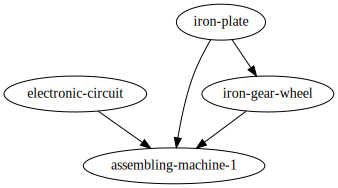

In [18]:
graph = build_recipe_graph('assembling-machine-1', ['electronic-circuit', 'copper-plate', 'iron-plate'])
graph

In [7]:
get_crafting_sequence(Material("electronic-circuit", 4))

Materials electronic-circuit: 1
	Materials copper-cable: 2
		Materials copper-plate: 1
			Materials copper-ore: 1
	Materials iron-plate: 1
		Materials iron-ore: 1